In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

np.random.seed(0)

In [2]:
def kmeans_plot(data, model, title):
    X, Y = data[:, 0], data[:, 1]
    plt.figure(figsize=(8, 6))
    h = 0.02
    x_min, x_max = X.min() - 0.3, X.max() + 0.3
    y_min, y_max = Y.min() - 0.3, Y.max() + 0.3
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot border
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, 
               interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    
    # plot data with class
    pred = model.predict(data)
    # plt.plot(X, Y, 'b.', markersize=6)
    plt.scatter(X, Y, c=pred, s=10, cmap='plasma')
    

    # Plot the centroids
    centroids = model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=3,
                color='w', zorder=10)

    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [3]:
def agglo_plot(data, model, title):
    pred = model.labels_.astype(np.int)
    
    X, Y = data[:, 0], data[:, 1]
    plt.figure(figsize=(8, 6))
    h = 0.02
    x_min, x_max = X.min() - 0.3, X.max() + 0.3
    y_min, y_max = Y.min() - 0.3, Y.max() + 0.3      
    
    # plot data with class
    # plt.plot(X, Y, 'b.', markersize=6)
    plt.scatter(X, Y, c=pred, s=10, cmap='plasma')

    # Plot the centroids
    # centroids = model.cluster_centers_
    # plt.scatter(centroids[:, 0], centroids[:, 1],
    #             marker='x', s=50, linewidths=3,
    #             color='w', zorder=10)

    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

#### Generate 4 datasets:
1. Non-Cluster Data
2. Non-Spherical Data
3. Many Clusters, close to each other
4. Different Cluster Sizes
5. Different Cluster Densities

In [4]:
# generate data_1: non-cluster data
data_1x = np.random.uniform(low=-4, high=4, size=200)
data_1y = np.random.uniform(low=-4, high=4, size=200)
data_1 = np.array([[x, y] for x, y in zip(data_1x, data_1y)])
data_1 = StandardScaler().fit_transform(data_1)

plt.figure(figsize=(8, 6))
plt.scatter(data_1[:, 0], data_1[:, 1], c='blue', s=10)

In [5]:
# For the 1st dataset, do kmeans from 10 to 25, plot elbow graph
sse = {}
for k in range(5, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_1)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('number of clusters -- k for the 1st dataset')
plt.ylabel('SSE')
plt.show()

In [6]:
# For the 1st dataset, do kmeans fixing k=6 (from elbow plot)
kmeans = KMeans(init='k-means++', n_clusters=6)
kmeans.fit(data_1)

title = 'K-means on the 1st dataset: non-cluster data'
kmeans_plot(data=data_1, model=kmeans, title=title)

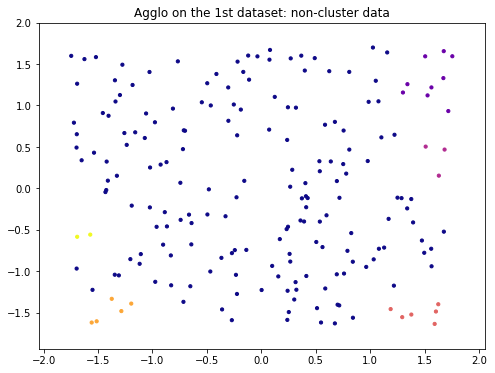

In [7]:
connectivity = kneighbors_graph(
    data_1, 
    n_neighbors=10, 
    include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agglo = AgglomerativeClustering(
    n_clusters=6, 
    linkage='average',
    connectivity=connectivity)
agglo.fit(data_1)

title = 'Agglo on the 1st dataset: non-cluster data'
agglo_plot(data=data_1, model=agglo, title=title)

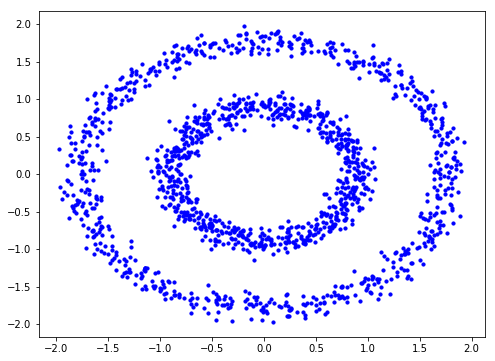

In [8]:
# generate data_2: non-spherical data

# inner ring:
# r_1 = np.random.uniform(low=0, high=0.5, size=200)
# arg_1 = np.random.uniform(low=0, high=360, size=200)
# ring_1 = np.array([[r * np.cos(arg), r * np.sin(arg)] 
#                   for r, arg in zip(r_1, arg_1)])

# outer ring:
# r_2 = np.random.uniform(low=3, high=4, size=1000)
# arg_2 = np.random.uniform(low=0, high=360, size=1000)
# ring_2 = np.array([[r * np.cos(arg), r * np.sin(arg)] 
#                   for r, arg in zip(r_2, arg_2)])

# put the two parts together:
# data_2 = np.concatenate((ring_1, ring_2), axis=0)
data_2, _ = make_circles(n_samples=1500,
                         factor=0.5,
                         noise=0.05)
data_2 = StandardScaler().fit_transform(data_2)

plt.figure(figsize=(8, 6))
plt.scatter(data_2[:, 0], data_2[:, 1], c='blue', s=10)

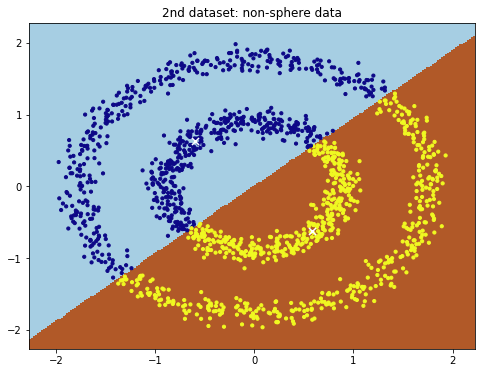

In [9]:
# For the 2nd dataset, do cluster with kmeans of k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_2)

title = '2nd dataset: non-sphere data'
kmeans_plot(data=data_2, model=kmeans, title=title)

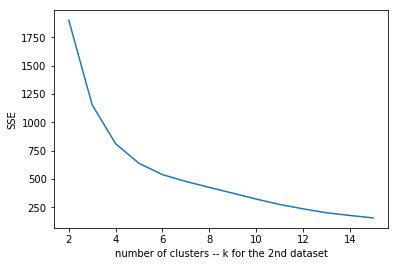

In [10]:
# For the 2nd dataset, do kmeans from 2 to 15, plot elbow graph
sse = {}
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(
        StandardScaler().fit_transform(data_2))
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('number of clusters -- k for the 2nd dataset')
plt.ylabel('SSE')
plt.show()

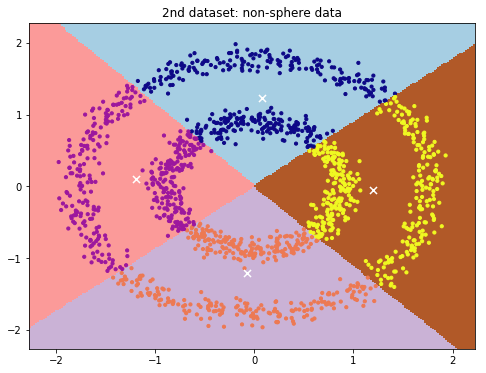

In [11]:
# For the 2nd dataset, do cluster with kmeans of optimal k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(StandardScaler().fit_transform(data_2))

title = '2nd dataset: non-sphere data'
kmeans_plot(data=data_2, model=kmeans, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


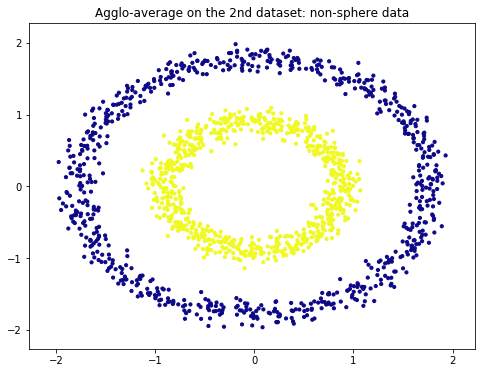

In [12]:
connectivity = kneighbors_graph(
    data_2, 
    n_neighbors=10, 
    include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage='average',
    connectivity=connectivity)
agglo.fit(data_2)

title = 'Agglo-average on the 2nd dataset: non-sphere data'
agglo_plot(data=data_2, model=agglo, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


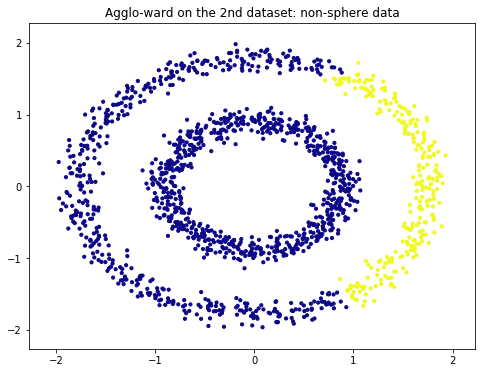

In [13]:
agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward',
    connectivity=connectivity)
agglo.fit(data_2)

title = 'Agglo-ward on the 2nd dataset: non-sphere data'
agglo_plot(data=data_2, model=agglo, title=title)

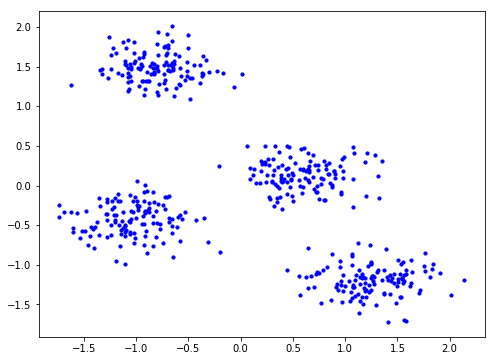

In [14]:
# generate data_3: many clusters, close to each other
data_3, _ = make_blobs(n_samples=500, 
                       centers=4,
                       cluster_std=0.5, 
                       random_state=0)
data_3 = StandardScaler().fit_transform(data_3)

plt.figure(figsize=(8, 6))
plt.scatter(data_3[:, 0], data_3[:, 1], c='blue', s=10)

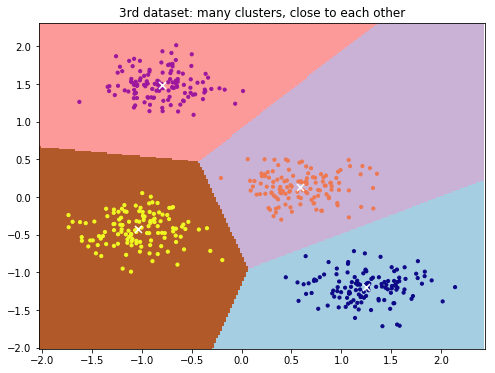

In [15]:
# For the 3rd dataset, do cluster with kmeans of k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_3)

title = '3rd dataset: many clusters, close to each other'
kmeans_plot(data=data_3, model=kmeans, title=title)

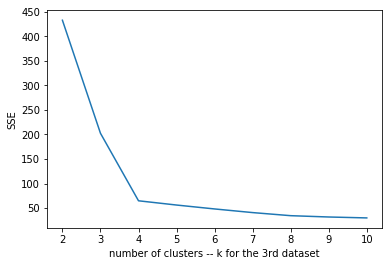

In [16]:
# For the 3rd dataset, do kmeans from 2 to 10, plot elbow graph
sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_3)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('number of clusters -- k for the 3rd dataset')
plt.ylabel('SSE')
plt.show()

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


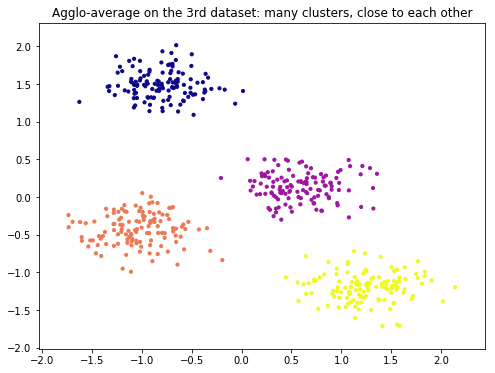

In [17]:
connectivity = kneighbors_graph(
    data_3, 
    n_neighbors=5, 
    include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agglo = AgglomerativeClustering(
    n_clusters=4,
    linkage='average',
    connectivity=connectivity)
agglo.fit(data_3)

title = 'Agglo-average on the 3rd dataset: many clusters, close to each other'
agglo_plot(data=data_3, model=agglo, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


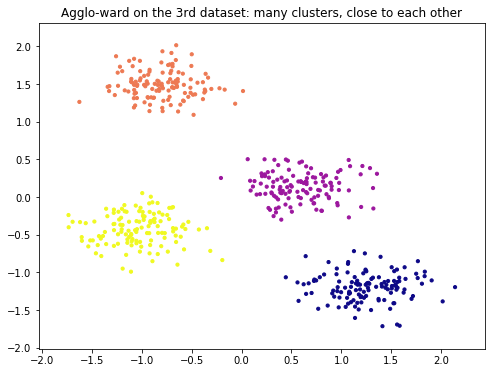

In [18]:
agglo = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward',
    connectivity=connectivity)
agglo.fit(data_3)

title = 'Agglo-ward on the 3rd dataset: many clusters, close to each other'
agglo_plot(data=data_3, model=agglo, title=title)

In [19]:
# generate data_4: different cluster sizes
data_4, _ = make_blobs(
    n_samples=[500, 100, 100], 
    centers=[[0, 0], [-3, 0], [3, 0]],
    cluster_std=[0.4, 0.2, 0.2], 
    random_state=0)
data_4 = StandardScaler().fit_transform(data_4)

plt.figure(figsize=(8, 6))
plt.scatter(data_4[:, 0], data_4[:, 1], c='blue', s=10)

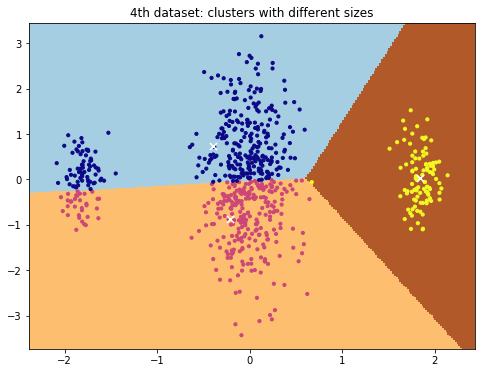

In [20]:
# For the 4th dataset, do cluster with kmeans of k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_4)

title = '4th dataset: clusters with different sizes'
kmeans_plot(data=data_4, model=kmeans, title=title)

In [21]:
# For the 4th dataset, do kmeans from 2 to 10, plot elbow graph
sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_4)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('number of clusters -- k for the 3rd dataset')
plt.ylabel('SSE')
plt.show()

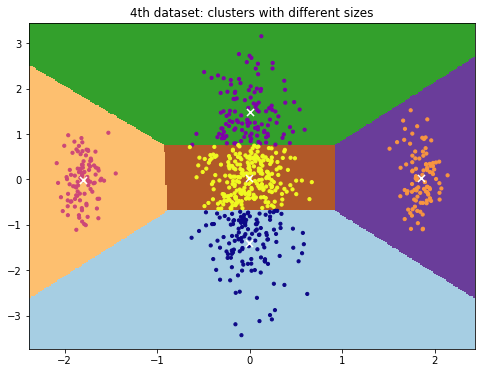

In [22]:
# For the 4th dataset, do cluster with kmeans of k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_4)

title = '4th dataset: clusters with different sizes'
kmeans_plot(data=data_4, model=kmeans, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


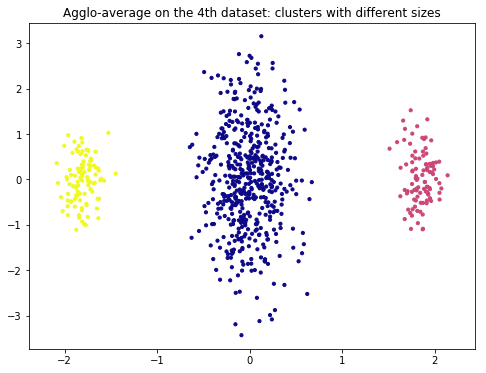

In [23]:
connectivity = kneighbors_graph(
    data_4, 
    n_neighbors=5, 
    include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='average',
    connectivity=connectivity)
agglo.fit(data_4)

title = 'Agglo-average on the 4th dataset: clusters with different sizes'
agglo_plot(data=data_4, model=agglo, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


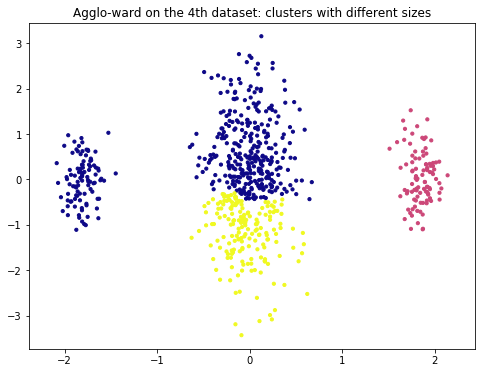

In [24]:
agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    connectivity=connectivity)
agglo.fit(data_4)

title = 'Agglo-ward on the 4th dataset: clusters with different sizes'
agglo_plot(data=data_4, model=agglo, title=title)

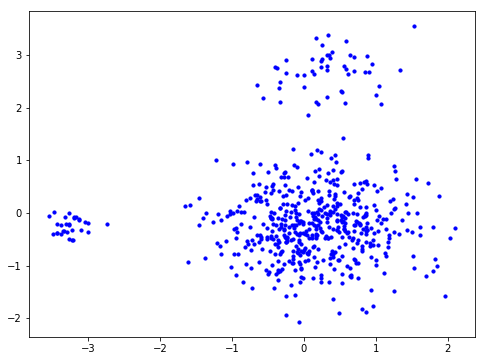

In [25]:
# generate data_5: different cluster densities
data_5, _ = make_blobs(
    n_samples=[500, 30, 50], 
    centers=[[0, 0], [-2, 0], [0, 2]],
    cluster_std=[0.4, 0.1, 0.3], 
    random_state=0)
data_5 = StandardScaler().fit_transform(data_5)

plt.figure(figsize=(8, 6))
plt.scatter(data_5[:, 0], data_5[:, 1], c='blue', s=10)

In [26]:
# For the 5th dataset, do kmeans from 2 to 10, plot elbow graph
sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_5)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('number of clusters -- k for the 3rd dataset')
plt.ylabel('SSE')
plt.show()

In [27]:
# For the 5th dataset, do cluster with kmeans of k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_5)

title = '5th dataset: clusters with different densities'
kmeans_plot(data=data_5, model=kmeans, title=title)

In [28]:
connectivity = kneighbors_graph(
    data_5, 
    n_neighbors=2, 
    include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='average',
    connectivity=connectivity)
agglo.fit(data_5)

title = 'Agglo-average on the 5th dataset: clusters with different densities'
agglo_plot(data=data_5, model=agglo, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


In [29]:
agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward',
    connectivity=connectivity)
agglo.fit(data_5)

title = 'Agglo-ward on the 5th dataset: clusters with different densities'
agglo_plot(data=data_5, model=agglo, title=title)

/usr/lib/python3.7/site-packages/sklearn/cluster/hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
